# Gene Expression Levels

In this project, we will analyze a single-cell RNA-seq dataset, with the goal of unveiling hierarchical structure and discovering important genes. The datasets provided are all different subsets of a larger single-cell RNA-seq dataset, compiled by the Allen Institute. This data contains cells from the mouse neocortex, a region in the brain which governs higher-level functions such as perception and cognition.

The single-cell RNA-seq data comes in the form of a counts matrix, where

each row corresponds to a cell

each column corresponds to the normalized transcript compatibility count (TCC) of an equivalence class of short RNA sequences, rescaled to units of counts per million. the TCC entry at location $(i, j)$ of the data matrix is the level of expression of the $j$-th gene in the $i$-th cell.

In [2]:
# imports

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": True, 
    
    # configure fonts
    "font.size":12,             # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 12,
    "axes.titlesize":14,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}

In [3]:
X = np.load('X.npy')

In [4]:
n_cells, n_genes = X.shape

print(f"Number of cells (in rows):  {n_cells} ")
print(f"Number of genes (in columns):  {n_genes} ")

Number of cells (in rows):  511 
Number of genes (in columns):  45768 


In [5]:
print(np.max(X[:, 0]))

11.941397591320595


## Plotting the expression levels of gene 0

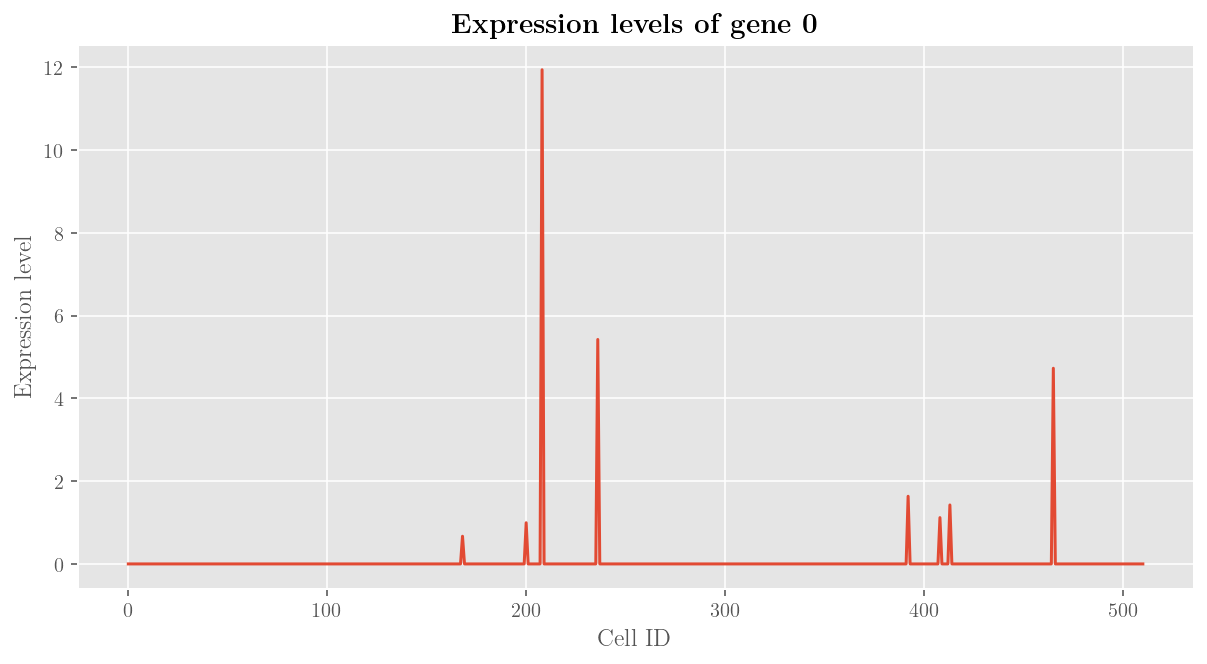

In [6]:
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

plt.plot(X[:, 0]);
plt.title(r"\textbf{Expression levels of gene 0}")
plt.xlabel(r"Cell ID");
plt.ylabel(r"Expression level");

## Log transform

Due to the presence of genes with extremely high magnitudes of expression in only a few cells, it is common to apply a log-transform to the data

\begin{equation}X_{trans} = log_2(X + 1)\end{equation}

Now why $X + 1$? The gener experssion levels $\in (0, \infty)$. Taking a log of some quantity close to 0 will result in negative values and tending towards $-\infty$. Therefore we add 1 to the expression values to restrict $X_{transformed} \in (0, \infty)$.

In [7]:
X_transformed = np.log2(X+1)

print(np.max(X_transformed[:, 0]))

3.6939215228197613


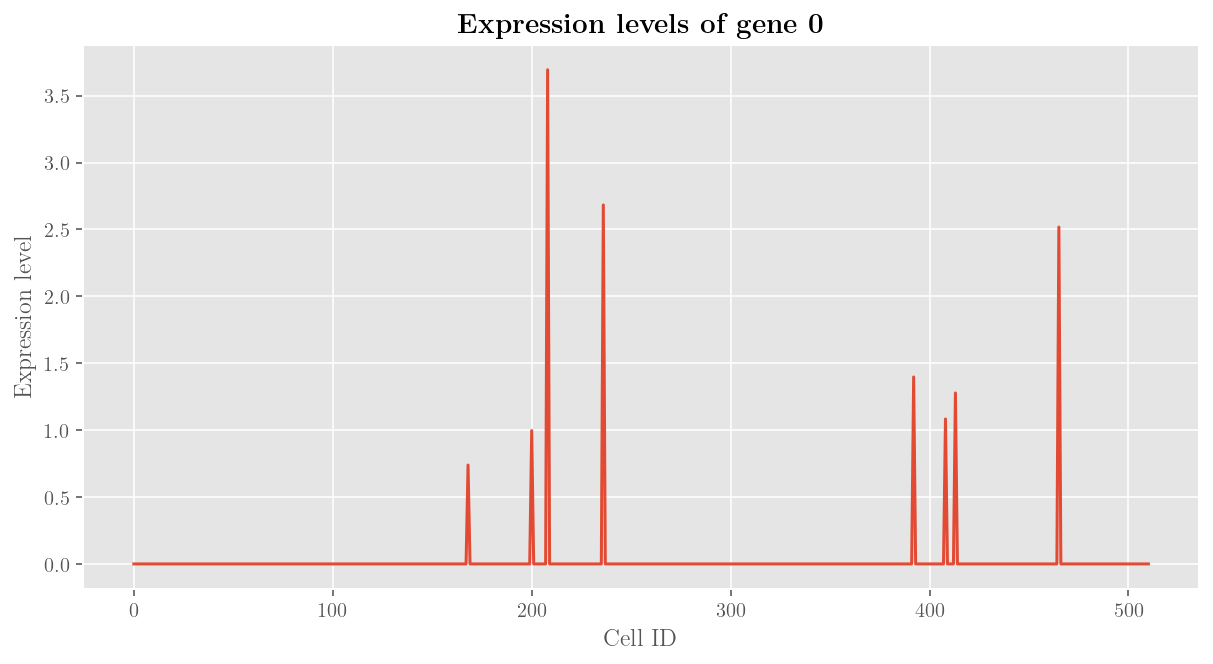

In [8]:
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

plt.plot(X_transformed[:, 0]);
plt.title(r"\textbf{Expression levels of gene 0}")
plt.xlabel(r"Cell ID");
plt.ylabel(r"Expression level");

We observe that the epression levels don't vary as much as the raw data

## Principal Component Analysis on raw data

In [9]:
pca_raw = PCA()
pca_raw.fit(X)


PCA()

In [10]:
print(max(pca_raw.explained_variance_ratio_))
exp_var_ratio_raw = pca_raw.explained_variance_ratio_

0.42779670983572676


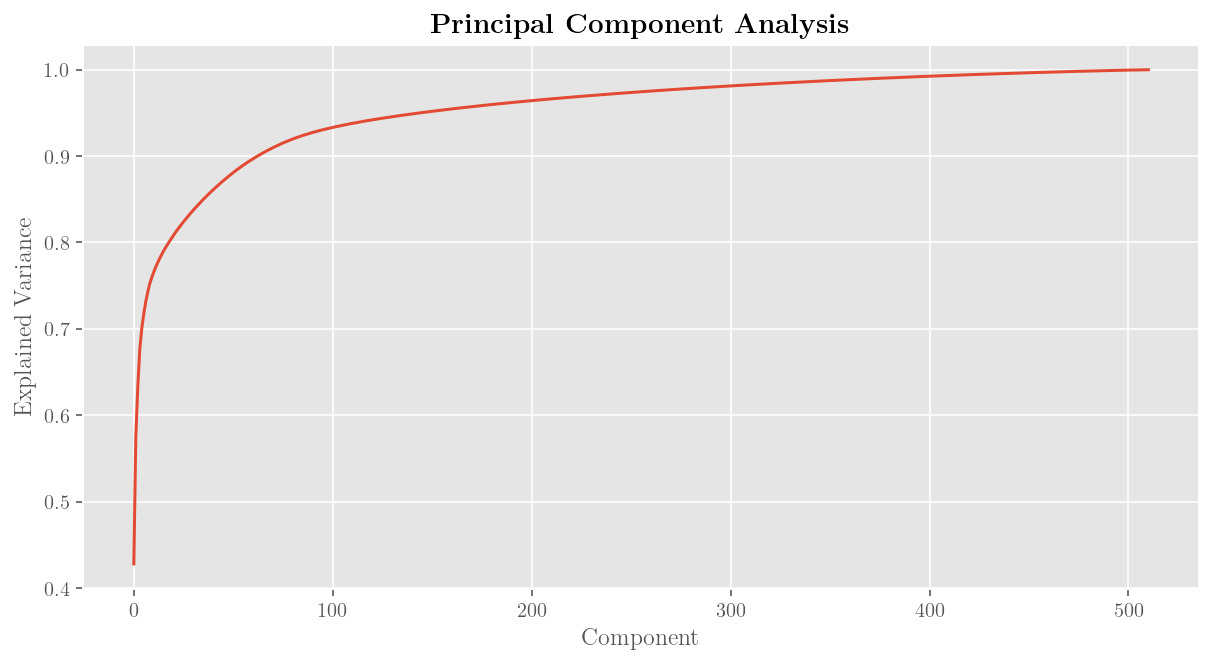

In [11]:
exp_var_cumsum_raw = np.cumsum(exp_var_ratio_raw)
plt.plot(exp_var_cumsum_raw)

plt.title(r"\textbf{Principal Component Analysis}")
plt.xlabel(r"Component");
plt.ylabel(r"Explained Variance");

## No. of Principa, components required to explain 85% of the variance 

In [12]:
len(np.where(exp_var_cumsum_raw < 0.85)[0])

35

## PCA on log-transformed data

In [13]:
pca_trans = PCA()
pca_trans.fit(X_transformed)
print(max(pca_trans.explained_variance_ratio_))

0.13887564870826197


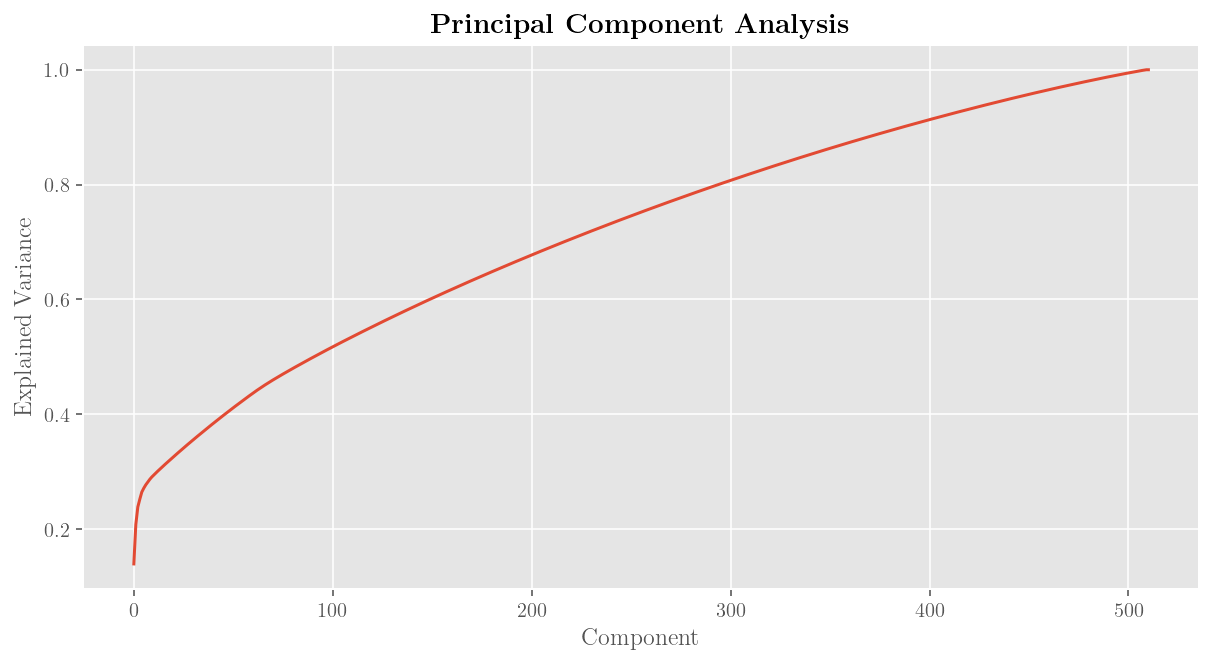

In [14]:
exp_var_cumsum = np.cumsum(pca_trans.explained_variance_ratio_)
plt.plot(exp_var_cumsum)

plt.title(r"\textbf{Principal Component Analysis}")
plt.xlabel(r"Component");
plt.ylabel(r"Explained Variance");

In [15]:
len(np.where(exp_var_cumsum < 0.85)[0])

338

## Visualize with PCA

### With 1st and second component 

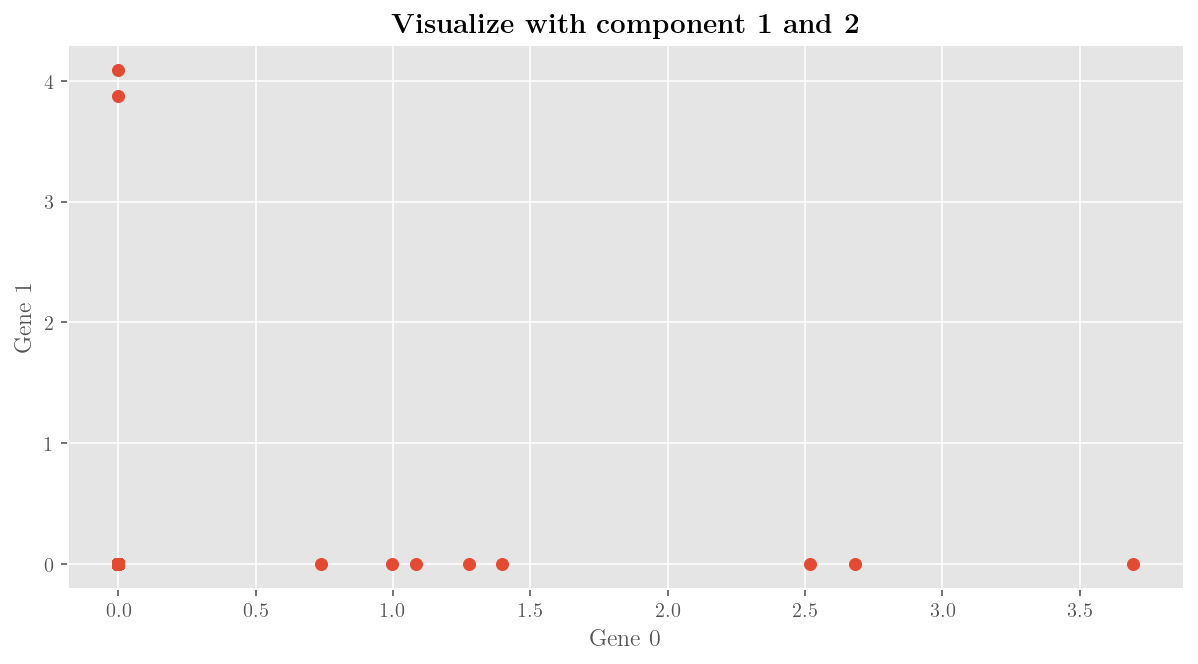

In [16]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

plt.title(r"\textbf{Visualize with component 1 and 2}")
plt.xlabel(r"Gene 0");
plt.ylabel(r"Gene 1");

### With first and second principal component

In [17]:
X_new = pca_trans.fit_transform(X_transformed)

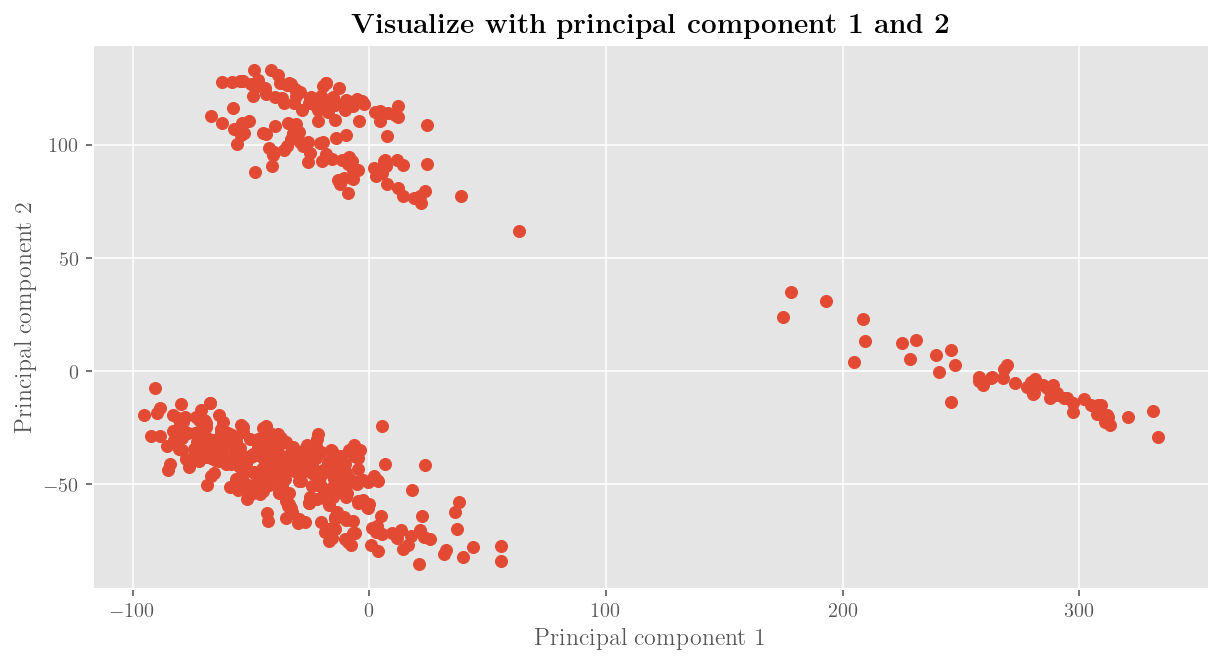

In [18]:
plt.scatter(X_new[:, 0], X_new[:, 1])

plt.title(r"\textbf{Visualize with principal component 1 and 2}")
plt.xlabel(r"Principal component 1");
plt.ylabel(r"Principal component 2");

## Visualize with MultiDimensional scalling

In [19]:
embedding = MDS(n_components=2, n_init=3)
X_embedded_MDS = embedding.fit_transform(X_transformed)

In [20]:
X_embedded_MDS.shape

(511, 2)

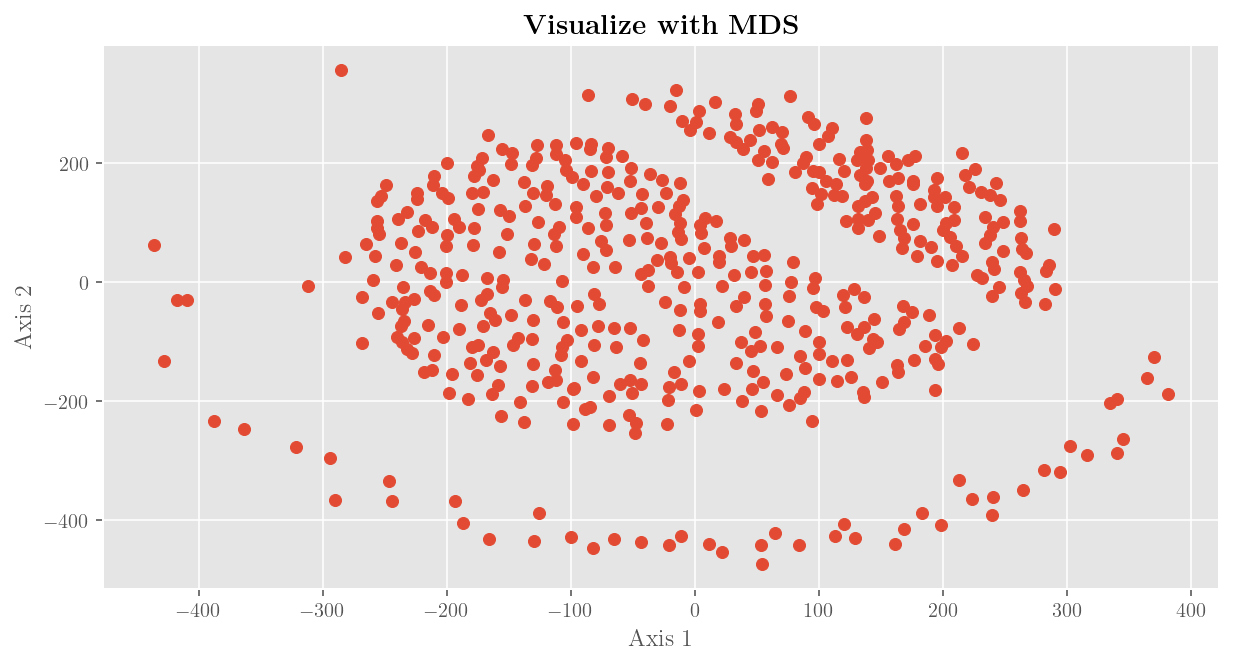

In [21]:
plt.scatter(X_embedded_MDS[:, 0], X_embedded_MDS[:, 1])

plt.title(r"\textbf{Visualize with MDS}")
plt.xlabel(r"Axis 1");
plt.ylabel(r"Axis 2");

## Visualize with TSNE

In [22]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=40.0).fit_transform(X_new[:, :50])

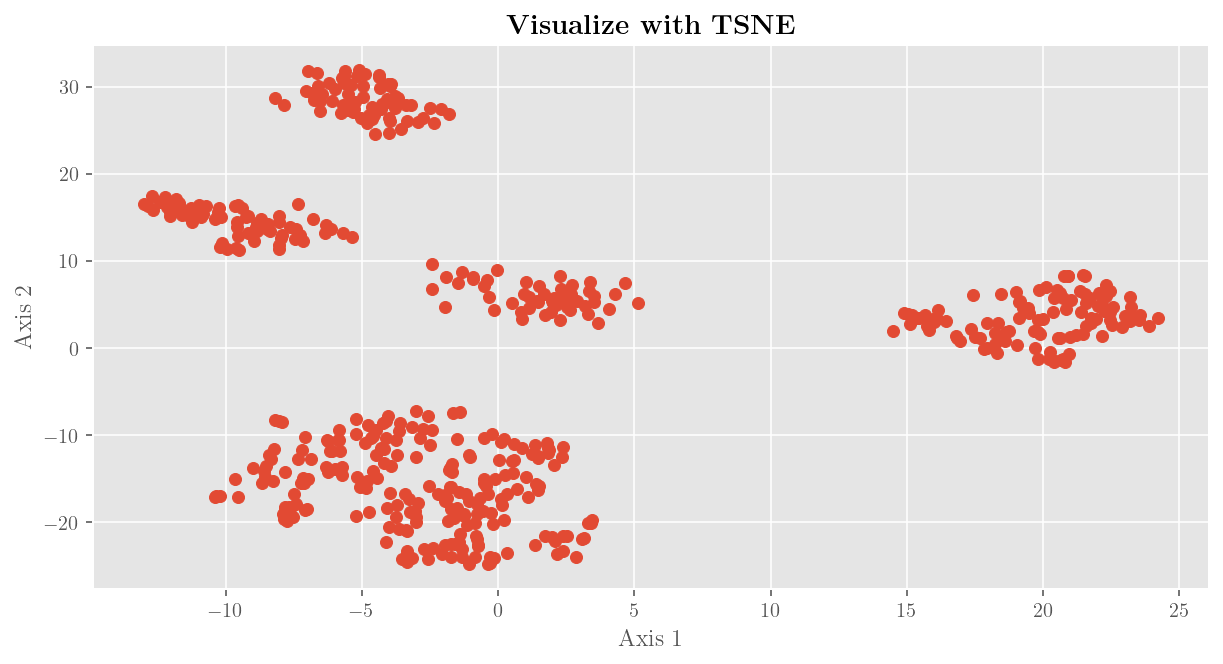

In [23]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

plt.title(r"\textbf{Visualize with TSNE}")
plt.xlabel(r"Axis 1");
plt.ylabel(r"Axis 2");

In [25]:
tsne_embeddings = []
for i, n_comps in enumerate([1, 10, 50, 100, 250, 500]):
    X_TSNE = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=40.0).fit_transform(X_new[:, :n_comps])
    tsne_embeddings.append(X_TSNE)

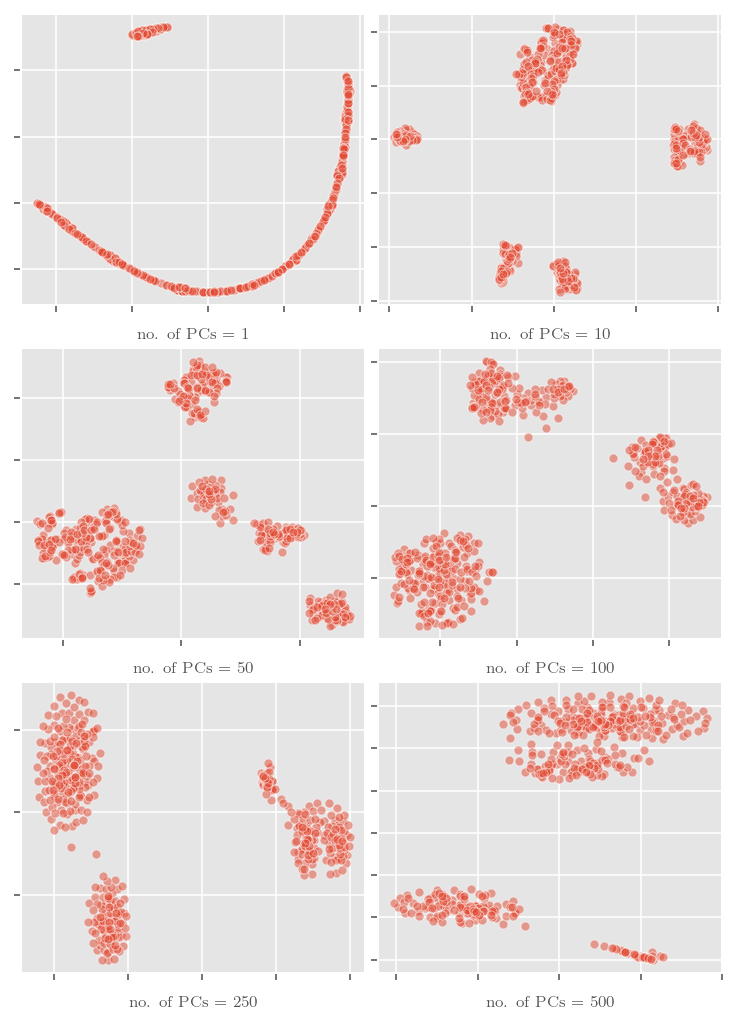

In [27]:
plot_style["figure.figsize"] = '5, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 2)

for i, n_comps in enumerate([1, 10, 50, 100, 250, 500]):
    x = (i)//2
    y = (i)%2
    ax = axs[x][y]
    X_TSNE =tsne_embeddings[i]             
    ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], alpha=0.5, s=20,
#                color= colors,
               edgecolors={'white'},
              )
    ax.set_xlabel(f'no. of PCs = {n_comps}', size=8)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.tight_layout(pad=0.25, h_pad=0.25, w_pad=0.25)
fig.savefig(f'TSNE_no_of_PCs.pdf')

In [28]:
tsne_embeddings = []
for i, perp in enumerate([5, 10, 25, 50, 75, 100]):
    X_TSNE = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=perp).fit_transform(X_new[:, :500])
    tsne_embeddings.append(X_TSNE)

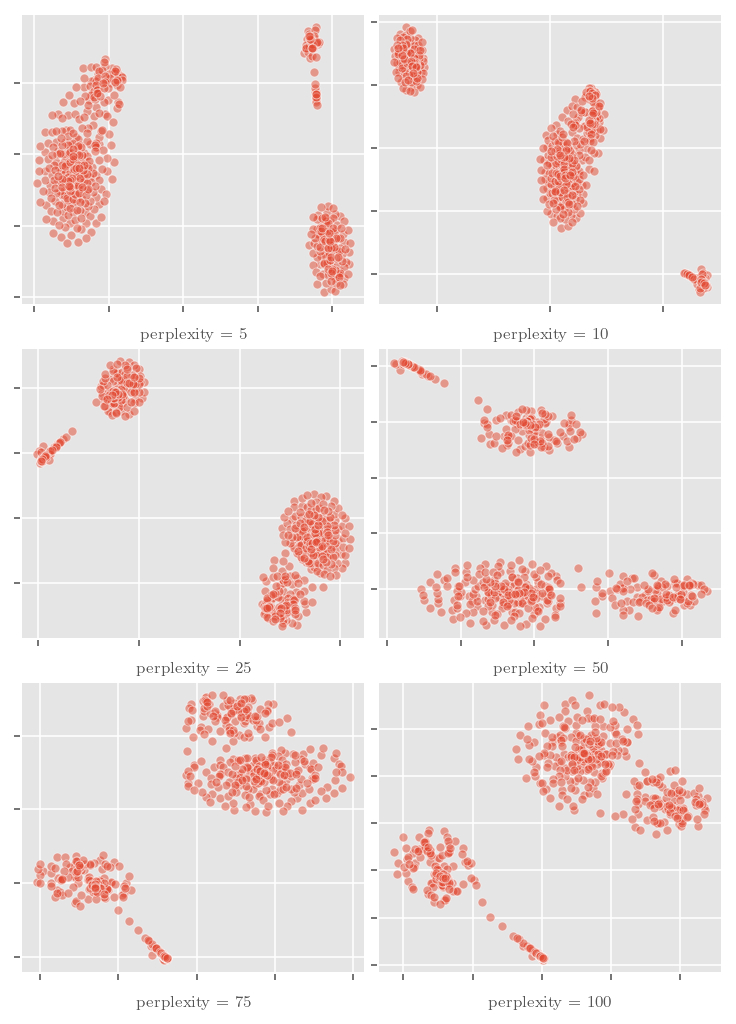

In [29]:
plot_style["figure.figsize"] = '5, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 2)

for i, perp in enumerate([5, 10, 25, 50, 75, 100]):
    x = (i)//2
    y = (i)%2
    ax = axs[x][y]
    X_TSNE =tsne_embeddings[i]             
    ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], alpha=0.5, s=20 ,
               edgecolors={'white'},
              )
    ax.set_xlabel(f'perplexity = {perp}', size=8)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.tight_layout(pad=0.25, h_pad=0.25, w_pad=0.25)
fig.savefig(f'TSNE_effect_of_perplexity.pdf')

In [30]:
tsne_embeddings = []
lrs = [50, 100, 200, 500, 1000, 1500]
for i,lr in enumerate(lrs):
    X_TSNE = TSNE(n_components=2, learning_rate=lr,init='random', perplexity=40).fit_transform(X_new[:, :500])
    tsne_embeddings.append(X_TSNE)

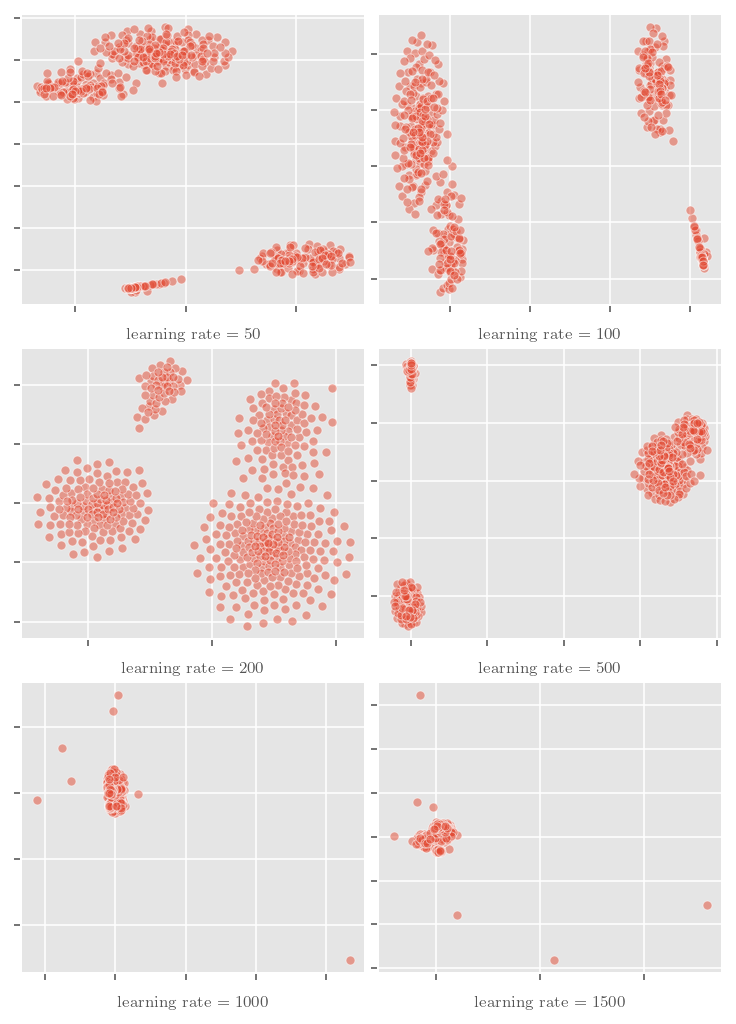

In [31]:
plot_style["figure.figsize"] = '5, 7'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

fig, axs = plt.subplots(3, 2)

for i, lr in enumerate(lrs):
    x = (i)//2
    y = (i)%2
    ax = axs[x][y]
    X_TSNE =tsne_embeddings[i]             
    ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], alpha=0.5, s=20 ,
               edgecolors={'white'},
              )
    ax.set_xlabel(f'learning rate = {lr}', size=8)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.tight_layout(pad=0.25, h_pad=0.25, w_pad=0.25)
fig.savefig(f'TSNE_effect_of_learning_rate.pdf')

# K-Means Clustering

In [32]:
kmeans = KMeans(n_clusters = 5)

kmeans.fit(X_new[:, :50])

labels = kmeans.labels_

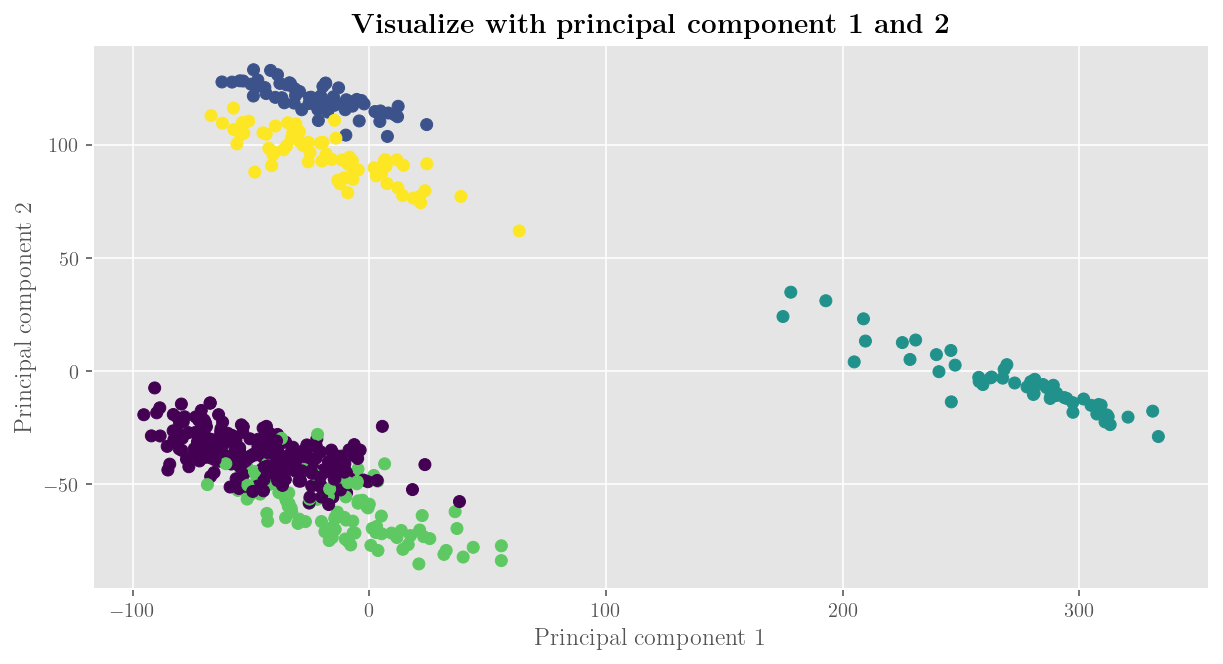

In [37]:
plot_style["figure.figsize"] = '10, 5'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

plt.scatter(X_new[:, 0], X_new[:, 1], c = labels)

plt.title(r"\textbf{Visualize with principal component 1 and 2}")
plt.xlabel(r"Principal component 1");
plt.ylabel(r"Principal component 2");

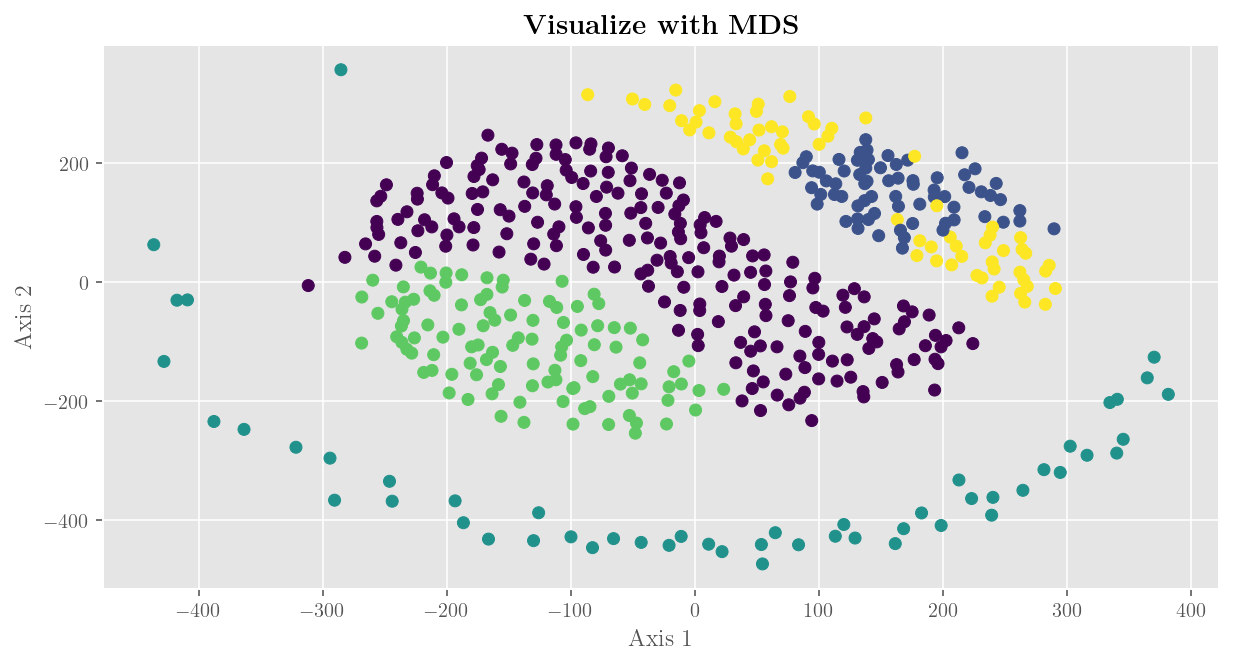

In [38]:
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

plt.scatter(X_embedded_MDS[:, 0], X_embedded_MDS[:, 1],  c=labels)

plt.title(r"\textbf{Visualize with MDS}")
plt.xlabel(r"Axis 1");
plt.ylabel(r"Axis 2");

In [ ]:
colors = [plt.cm.tab10(i) for i in kmeans.labels_]

Text(0.5, 1.0, '\\textbf{Visualize with TSNE}')

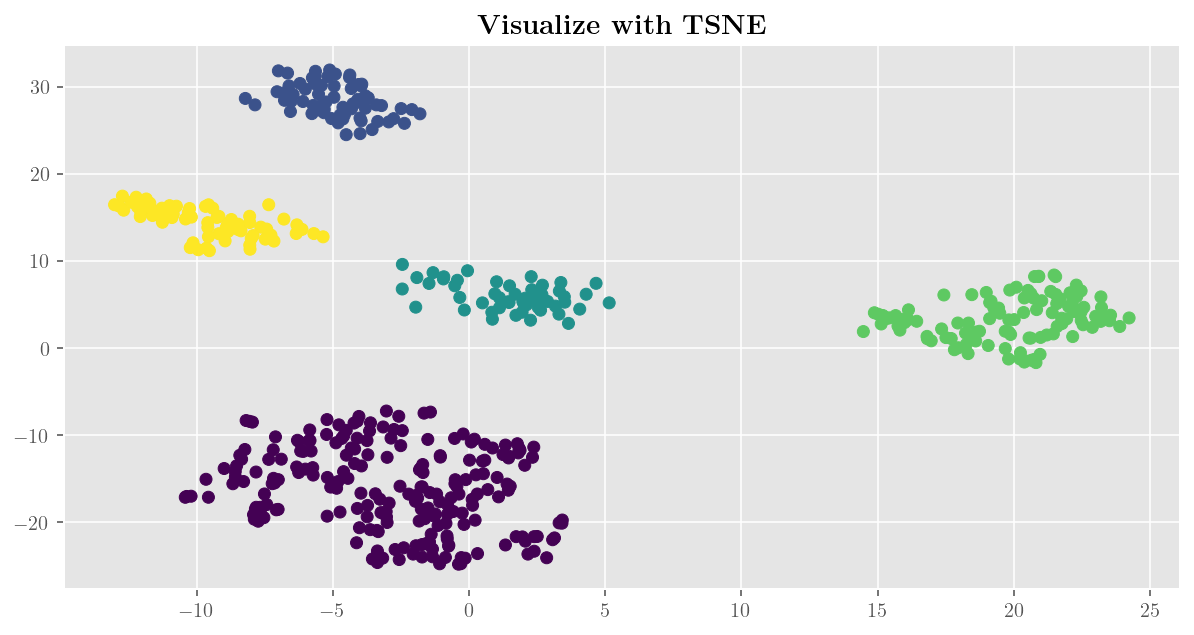

In [39]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels)

plt.title(r"\textbf{Visualize with TSNE}")

## FInding number of clusters using elbow method

In [40]:
WGSS = []

k = [i for i in range(2, 20, 1)]

for i in k:
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X_new[:, :50])
    WGSS.append(kmeans_i.inertia_)

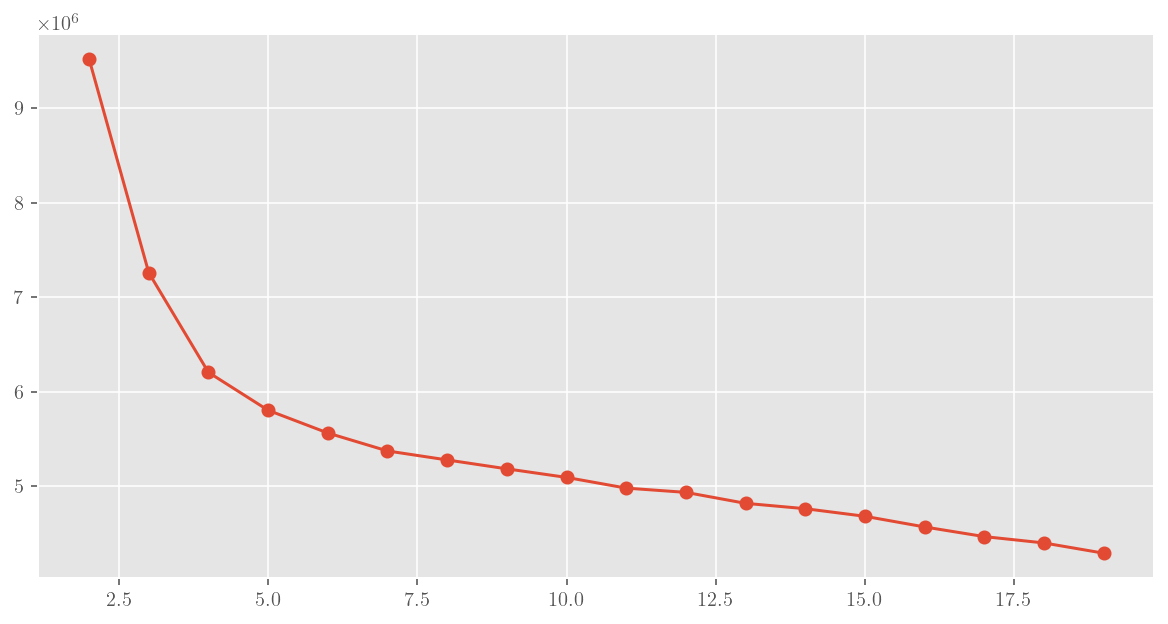

In [41]:
plt.plot(k, WGSS, marker='o')

In [42]:
round(WGSS[2], -2)

6202900.0

In [43]:
X_df = pd.DataFrame(X_transformed)

In [44]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
0,0.0,0.0,7.075268,7.374120,0.000000,4.658163,2.286841,0.0,6.556379,6.022762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.936759,6.626037,2.140997,0.000000,1.095512,0.0,4.878835,5.224213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,7.029173,7.231589,0.000000,4.369721,0.000000,0.0,4.448301,6.337209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.663803,6.888012,0.000000,5.537936,0.000000,0.0,0.000000,7.339907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,6.319946,7.591910,0.000000,3.535703,3.802412,0.0,5.477878,4.749761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize means

In [45]:
kmeans = KMeans(n_clusters = 5)

kmeans.fit(X_new[:, :50])

labels = kmeans.labels_

In [46]:
X_df['label'] = labels

In [47]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45759,45760,45761,45762,45763,45764,45765,45766,45767,label
0,0.0,0.0,7.075268,7.374120,0.000000,4.658163,2.286841,0.0,6.556379,6.022762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,5.936759,6.626037,2.140997,0.000000,1.095512,0.0,4.878835,5.224213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,7.029173,7.231589,0.000000,4.369721,0.000000,0.0,4.448301,6.337209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,6.663803,6.888012,0.000000,5.537936,0.000000,0.0,0.000000,7.339907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,6.319946,7.591910,0.000000,3.535703,3.802412,0.0,5.477878,4.749761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [48]:
means = X_df.groupby('label').mean()
means

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
label,,,,,,,,,,,,,,,,,,,,,
0,0.017485,0.000000,6.307842,5.890821,0.130490,1.262130,1.704538,0.0,5.769690,5.262205,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,5.993245,6.628917,0.500262,2.763998,1.939428,0.0,5.775377,5.563089,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006843,0.035905,5.963129,3.522792,0.482711,1.647741,1.364147,0.0,4.462042,4.860779,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,3.184992,4.219421,0.000000,0.885758,1.507906,0.0,2.017111,3.175199,...,0.0,0.035307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.145472,0.060192,5.970330,6.668063,0.118706,1.903138,1.861901,0.0,5.710924,5.640793,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
means_PCA = pca_trans.transform(means)

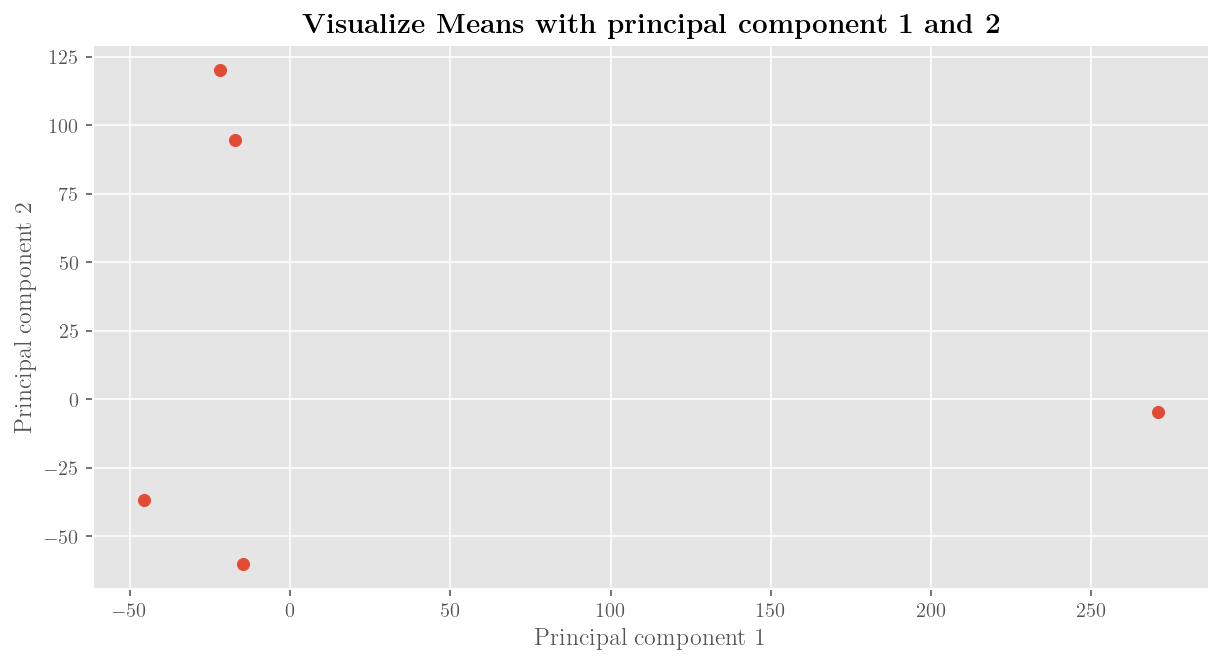

In [50]:
plt.scatter(means_PCA[:, 0], means_PCA[:, 1])

plt.title(r"\textbf{Visualize Means with principal component 1 and 2}")
plt.xlabel(r"Principal component 1");
plt.ylabel(r"Principal component 2");

In [51]:
means_MDS = embedding.fit_transform(means)

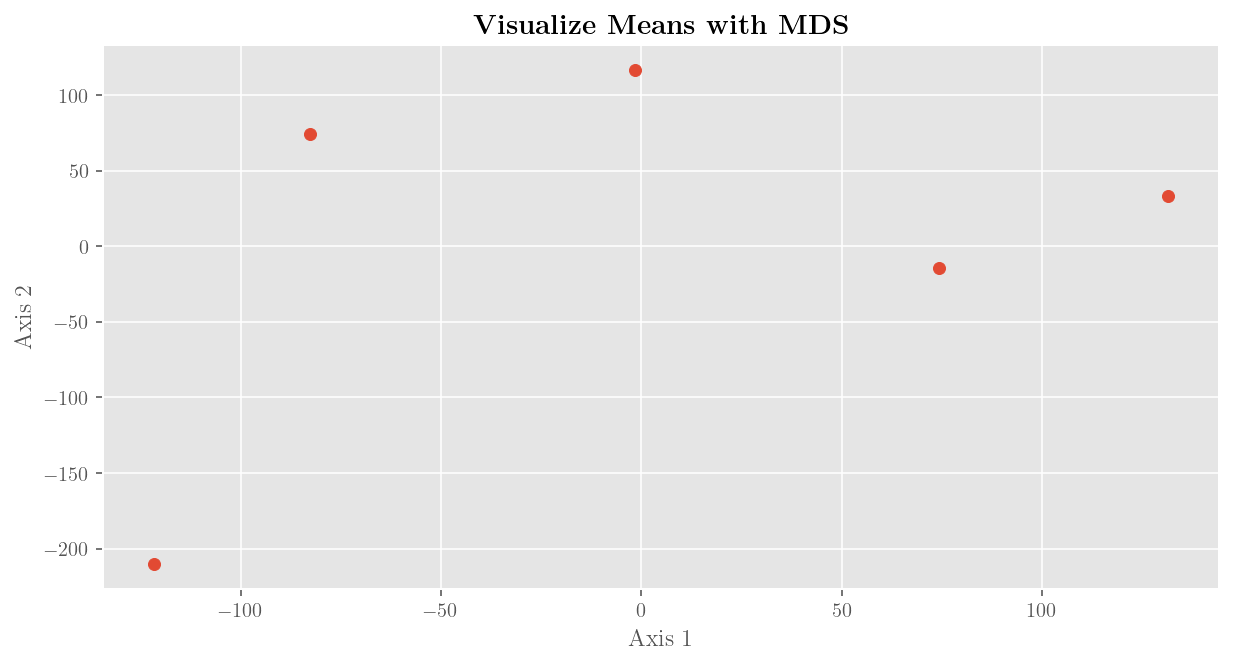

In [52]:
plt.scatter(means_MDS[:, 0], means_MDS[:, 1])

plt.title(r"\textbf{Visualize Means with MDS}")
plt.xlabel(r"Axis 1");
plt.ylabel(r"Axis 2");

In [53]:
means_TSNE = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=40.0).fit_transform(means)

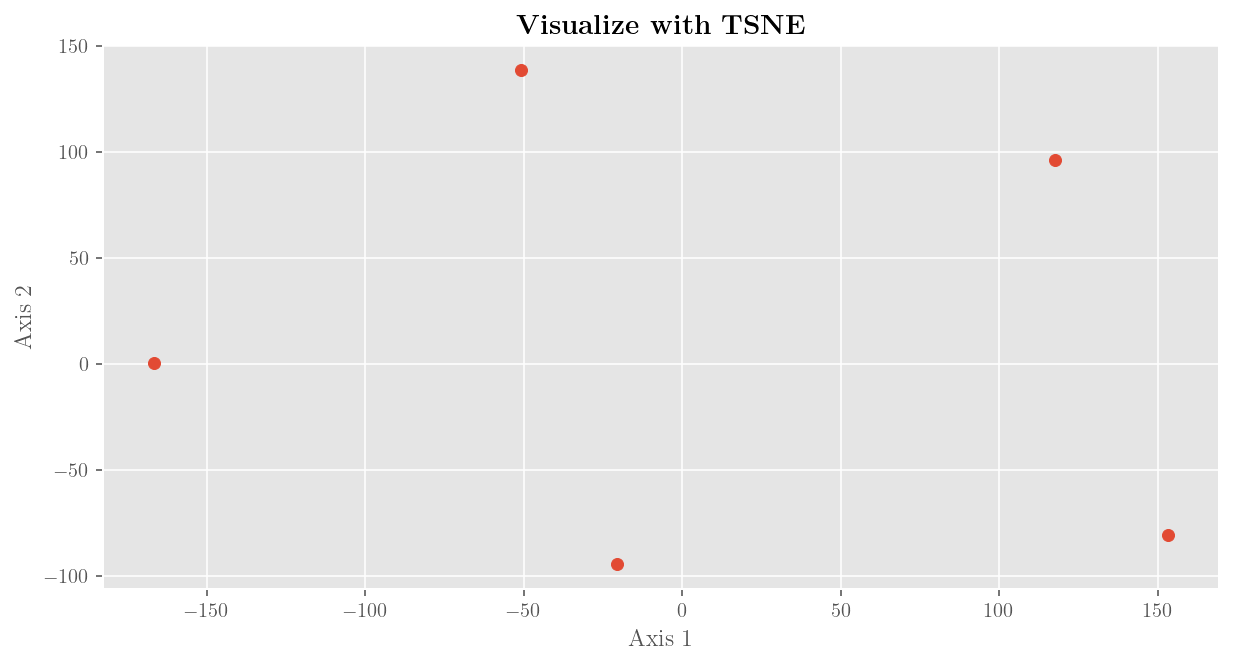

In [54]:
plt.scatter(means_TSNE[:, 0], means_TSNE[:, 1])

plt.title(r"\textbf{Visualize with TSNE}")
plt.xlabel(r"Axis 1");
plt.ylabel(r"Axis 2");

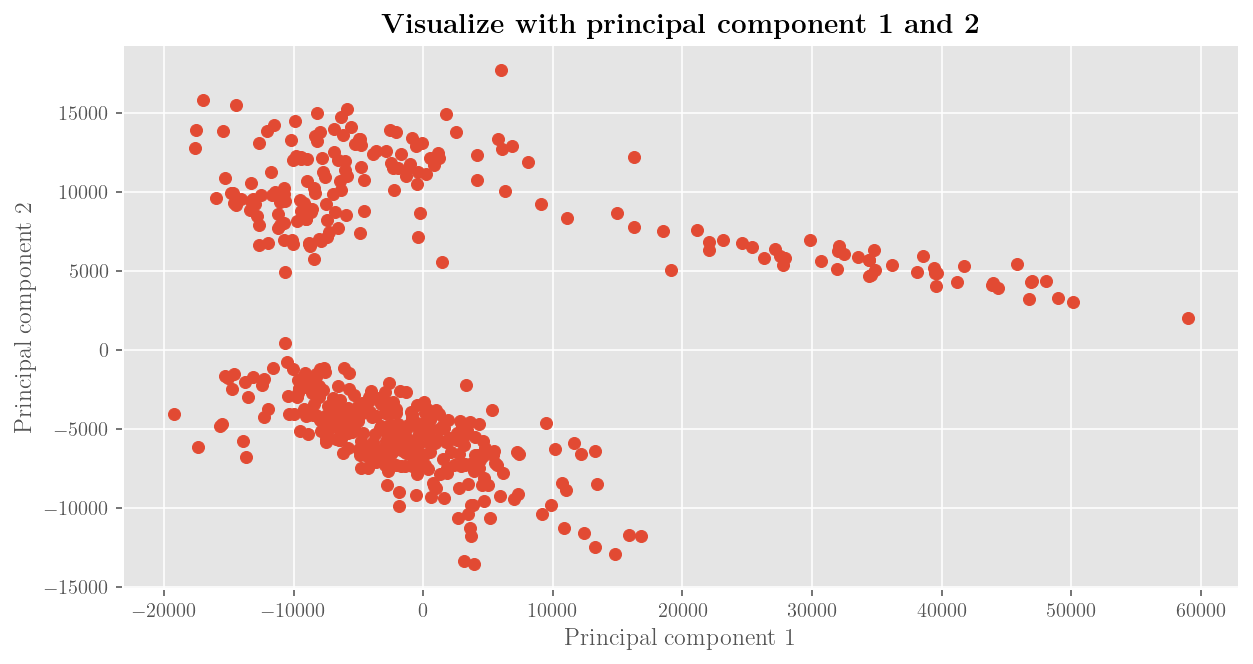

In [55]:
X_PCA = pca_trans.fit_transform(X)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1])

plt.title(r"\textbf{Visualize with principal component 1 and 2}")
plt.xlabel(r"Principal component 1");
plt.ylabel(r"Principal component 2");